In [1]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
# Load the data
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [6]:
# First 5 records of customers dataset
customers.head(3)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07


In [4]:
# shape of the customers dataset
print(f'No of rows and columns in customers dataset: {customers.shape[0]},{customers.shape[1]}')

No of rows and columns in customers dataset: 200,4


In [7]:
# first 5 records of products dataset
products.head(3)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12


In [8]:
# dimension of the products dataset
print(f'No of rows and columns in Products dataset: {products.shape[0]},{products.shape[1]}')

No of rows and columns in Products dataset: 100,4


In [9]:
# first 5 records of the transactions dataset
transactions.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68


In [10]:
# dimension of the transactions dataset
print(f'No of rows and columns in Transactions dataset: {transactions.shape[0]},{transactions.shape[1]}')

No of rows and columns in Transactions dataset: 1000,7


In [11]:
# merging of transaction dataset with customers dataset
transactions = pd.merge(transactions,customers,on='CustomerID',how='inner')

In [14]:
# merging of transactions dataset with customers dataset
data = pd.merge(transactions,products,on='ProductID',how='inner')

In [15]:
# First 5 records of customers dataset
data.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [16]:
# delete unecessary columns 
data.drop(columns=['CustomerID','ProductID','Price_x'],inplace=True)

In [17]:
# renaming price column
data.rename(columns={'Price_y':'Price'},inplace=True)

In [18]:
data.head(3)

,TransactionID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price
0,T00001,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [19]:
print(f'No of rows and columns in merged dataset: {data.shape[0]},{data.shape[1]}')

No of rows and columns in merged dataset: 1000,10


**Understand each and every column**
- **TransactionID:** Unique identifier for each transaction
- **TransactionDate:** Date of transaction
- **Quantity:** Quantityof the product purchased
- **TotalValue:** Total value of the transaction
- **ProductName:** Name of the product
- **Category:** Product category
- **Price:** Price of the product
- **CustomerName:** Name of the customer
- **Region:** Place of the customer
- **SignupDate:** Date when the customer signedup

In [20]:
# data.to_csv('merged_data.csv',index=False)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   TransactionDate  1000 non-null   object 
 2   Quantity         1000 non-null   int64  
 3   TotalValue       1000 non-null   float64
 4   CustomerName     1000 non-null   object 
 5   Region           1000 non-null   object 
 6   SignupDate       1000 non-null   object 
 7   ProductName      1000 non-null   object 
 8   Category         1000 non-null   object 
 9   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


## Exploratoty Data Analysis

**Categorical column understanding**

In [21]:
data.columns

Index(['TransactionID', 'TransactionDate', 'Quantity', 'TotalValue',
       'CustomerName', 'Region', 'SignupDate', 'ProductName', 'Category',
       'Price'],
      dtype='object')

In [ ]:
numerical = ['Quantity','TotalValue',]
categorical = ['Region','ProductName']
other = ['TransactionID','TransactionDate','CustomerName','SignupDate']

In [22]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'],format='mixed')
data['SignupDate'] = pd.to_datetime(data['SignupDate'],format='mixed')

In [23]:
data['TransactionMonth'] = data['TransactionDate'].dt.to_period('M')

In [24]:
data['SignupMonth'] = data['SignupDate'].dt.to_period('M')

In [25]:
data.sort_values(by='TransactionDate',ascending=True,inplace=True,ignore_index=True)

In [26]:
data.head()

,TransactionID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price,TransactionMonth,SignupMonth
0,T00869,2023-12-30 15:29:12,2,313.92,Kimberly Turner,Europe,2024-02-24,HomeSense Desk Lamp,Home Decor,156.96,2023-12,2024-02
1,T00605,2023-12-31 03:27:43,4,958.80,Jennifer King,Europe,2023-12-05,ActiveWear Smartphone,Electronics,239.70,2023-12,2023-12
2,T00154,2023-12-31 06:53:54,4,1585.36,Michael Harrell,Asia,2022-03-07,ActiveWear Jacket,Clothing,396.34,2023-12,2022-03
3,T00845,2023-12-31 15:44:04,2,911.44,Robert Sharp,North America,2024-10-27,ActiveWear Smartwatch,Electronics,455.72,2023-12,2024-10
4,T00818,2024-01-01 03:54:19,1,147.95,Jessica Warren,Asia,2022-03-14,TechPro Textbook,Books,147.95,2024-01,2022-03


**Observations:**
- There is an error in the data, a person signup in 2024, but the transacation history shows he is shopping in 2023.

In [27]:
categorical = ['Quantity','ProductName', 'Category','CustomerName', 'Region']
numerical = ['TotalValue','Price']

**1. Customer Analysis**

In [28]:
# Number of unique customers
data['CustomerName'].nunique()

199

**Observations**
- There is a customer who didn't buy anything

In [29]:
# Frequency of transactions in region
data['Region'].value_counts()

Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64

**2. Product Analysis**

In [30]:
# frequency of category
data['Category'].value_counts()

Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64

In [30]:
# revenue on the basis of category
category_revenue = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).head(5)
print(category_revenue)

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [31]:
# Revenue on the basis of product
product_revenue = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print(product_revenue)

ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


In [32]:
Frequency of quantity buying
data['Quantity'].value_counts()

Quantity
4    261
3    254
2    246
1    239
Name: count, dtype: int64

**3. Transaction Trends**

In [33]:
monthly_sales=data.groupby("TransactionMonth")["TotalValue"].sum()
print('total sales in each month:',monthly_sales)

total sales in each month: TransactionMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


In [34]:
avg_spend = data.groupby('CustomerName')['TotalValue'].mean()
print(avg_spend.describe())

count     199.000000
mean      687.580182
std       237.936649
min        82.360000
25%       542.941667
50%       677.207500
75%       828.624167
max      1323.133333
Name: TotalValue, dtype: float64


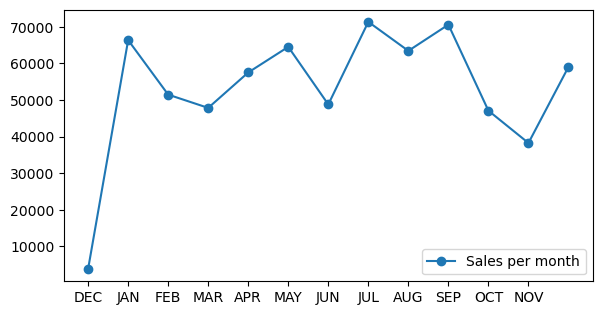

In [35]:
plt.figure(figsize=(15,12))
plt.subplot(3,2,1)
plt.plot(monthly_sales.values,marker='o',label='Sales per month')
x = monthly_sales.index.to_list()
months = ['DEC','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV']
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],months)
plt.legend()
plt.show()

In [36]:
sales_based_on_region=data.groupby("Region")["TotalValue"].sum()
print('total sales in each month:',sales_based_on_region)

total sales in each month: Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


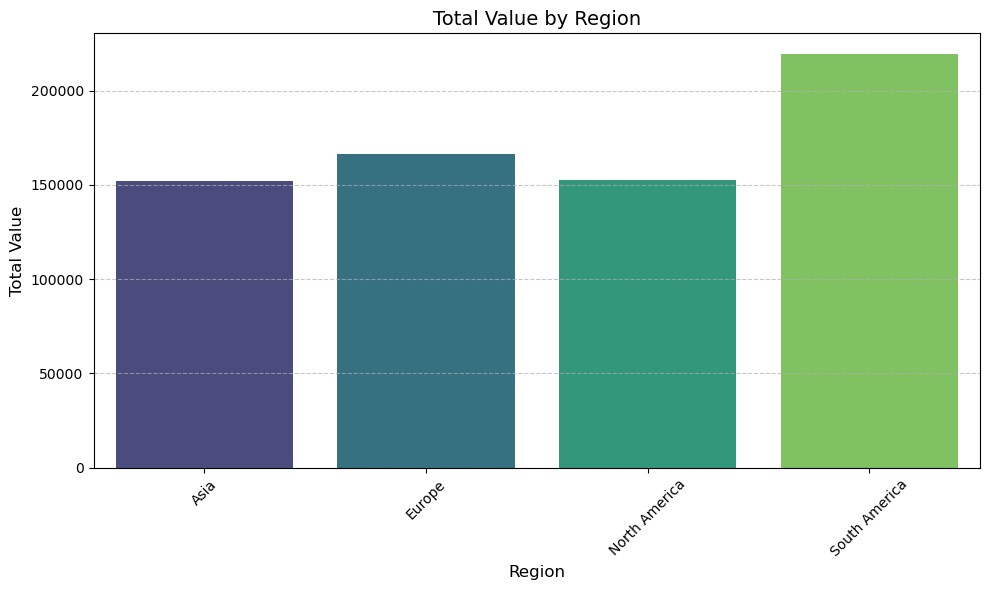

In [21]:
# Group data and calculate the sum
region_values = data.groupby("Region")["TotalValue"].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=region_values.index, y=region_values.values, palette="viridis")

# Add labels and title
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Value", fontsize=12)
plt.title("Total Value by Region", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

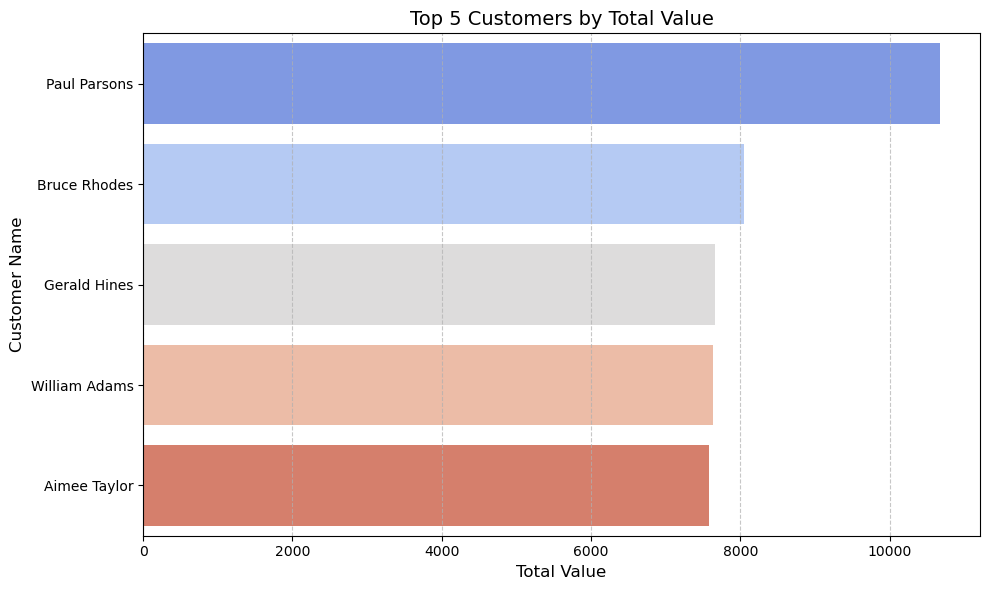

In [22]:
# Group data and calculate the sum
top_5_cust = data.groupby("CustomerName")["TotalValue"].sum()

# Sort and select the top 5 customers
top_5_cust = top_5_cust.sort_values(ascending=False).head()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_cust.values, y=top_5_cust.index, palette="coolwarm")

# Add labels and title
plt.xlabel("Total Value", fontsize=12)
plt.ylabel("Customer Name", fontsize=12)
plt.title("Top 5 Customers by Total Value", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


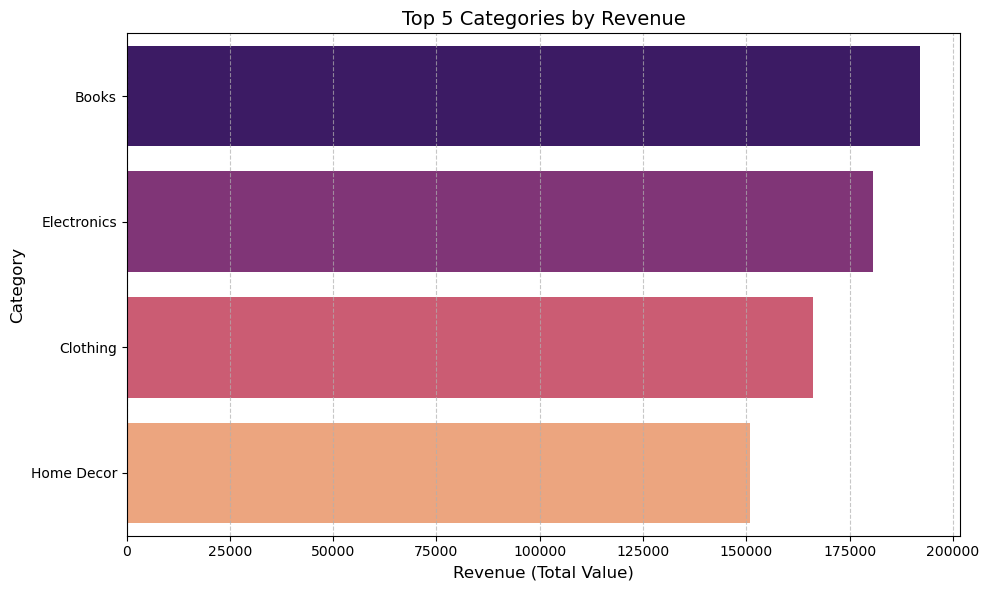

In [24]:
# Group data and calculate revenue on the basis of category
category_revenue = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).head(5)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="magma")

# Add labels and title
plt.xlabel("Revenue (Total Value)", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.title("Top 5 Categories by Revenue", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

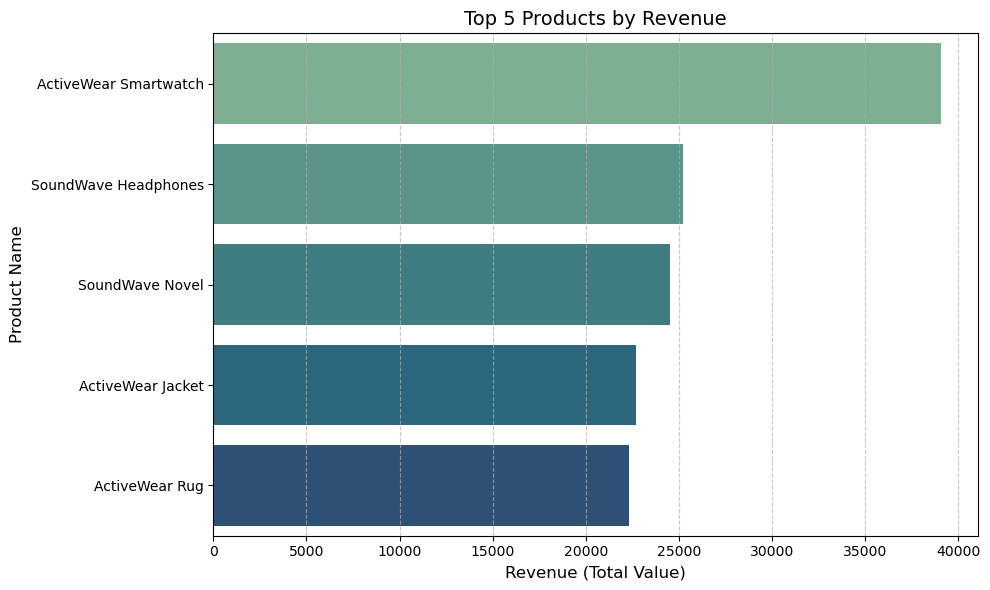

In [26]:
# Group data and calculate revenue on the basis of product
product_revenue = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue.values, y=product_revenue.index, palette="crest")

# Add labels and title
plt.xlabel("Revenue (Total Value)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.title("Top 5 Products by Revenue", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()